In [5]:
import pandas as pd
import arimafd as oa
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [2]:
df = pd.read_csv("data/valve1/6.csv", sep=';', index_col='datetime', parse_dates=True)

# df = pd.concat(valve1_data)
y_test = df["anomaly"]
df.drop(["anomaly", "changepoint"], inplace=True, axis=1)

df.sort_index(inplace=True)

### Calculation of Orders

In [6]:
ad = oa.Anomaly_detection(df) #init anomaly detection algorithm
ad.generate_tensor(ar_order=3) #it compute weights of ARIMA on history 
ts_anomaly = ad.proc_tensor() #processing of weights. 
predicted = ts_anomaly

C:\Python310\lib\site-packages\arimafd\tanh.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.ww=self.ww.append([self.w], ignore_index=True)
C:\Python310\lib\site-packages\arimafd\tanh.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.dif_w = self.dif_w.append([self.diff], ignore_index=True)


Time seconds: 34.910009145736694
Time seconds: 34.567049503326416
Time seconds: 37.5160698890686
Time seconds: 33.89312148094177
Time seconds: 33.331000328063965
Time seconds: 33.30421996116638
Time seconds: 33.46515965461731
Time seconds: 35.992000341415405


datetime
2020-03-09 12:14:39    0
2020-03-09 12:14:41    0
2020-03-09 12:14:42    0
2020-03-09 12:14:43    0
2020-03-09 12:14:44    0
                      ..
2020-03-09 12:34:31    0
2020-03-09 12:34:32    0
2020-03-09 12:34:33    0
2020-03-09 12:34:34    0
2020-03-09 12:34:35    0
Length: 1151, dtype: int32

In [28]:
predicted = ts_anomaly

In [29]:
df.head()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS
datetime,,,,,,,,
2020-03-09 12:14:36,0.027429,0.040353,0.770310,0.382638,71.2129,25.0827,219.789,32.0000
2020-03-09 12:14:37,0.027269,0.040226,1.096960,0.710565,71.4284,25.0863,233.117,32.0104
2020-03-09 12:14:38,0.027040,0.039773,1.140150,0.054711,71.3468,25.0874,234.745,32.0000
2020-03-09 12:14:39,0.027563,0.040313,1.108680,-0.273216,71.3258,25.0897,205.254,32.0104
2020-03-09 12:14:41,0.026570,0.039566,0.704404,0.382638,71.2725,25.0831,212.095,33.0000


In [35]:
len(y_test)

1154

In [39]:
predicted.to_frame().join(y_test, how='right').fillna(0)

,0,anomaly
datetime,,
2020-03-09 12:14:36,0.0,0.0
2020-03-09 12:14:37,0.0,0.0
2020-03-09 12:14:38,0.0,0.0
2020-03-09 12:14:39,1.0,0.0
2020-03-09 12:14:41,0.0,0.0
...,...,...
2020-03-09 12:34:31,0.0,0.0
2020-03-09 12:34:32,0.0,0.0
2020-03-09 12:34:33,0.0,0.0


Text(0.5, 1.0, 'Temperature')

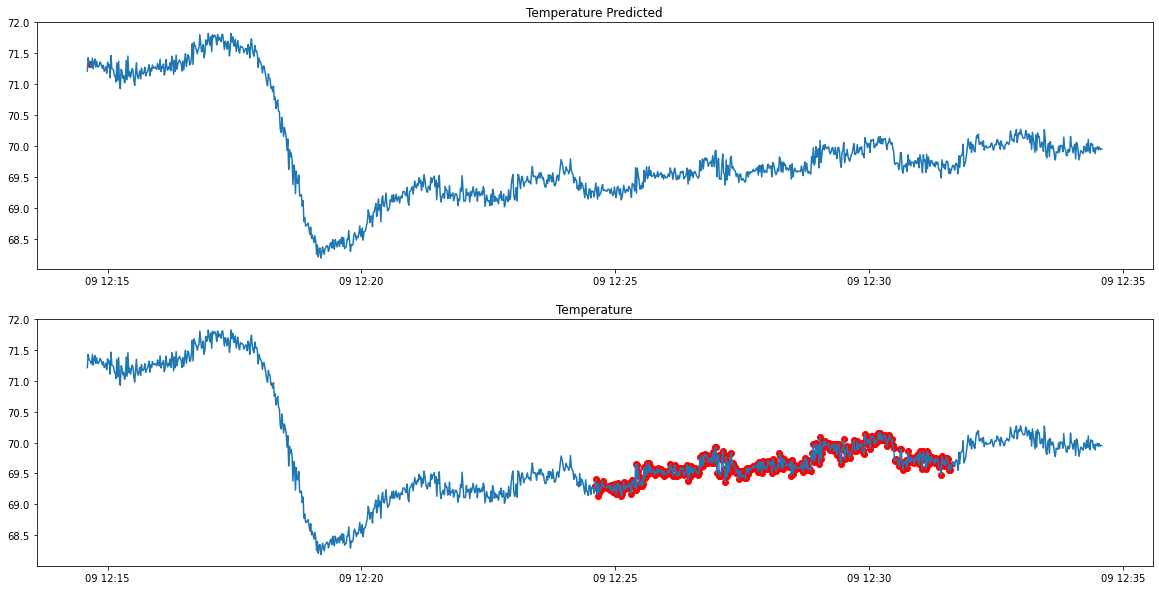

In [31]:
# plt.subplot(2, 1, 1)
fig, axs = plt.subplots(2, 1, figsize=(20,10))
values = df.Temperature
axs[0].plot(values)

y=predicted
anomalies_indecies = y.index[y == 1]
axs[0].scatter(anomalies_indecies, values[anomalies_indecies], color='r')
# #axs.scatter(cpi, temperatures[cpi], color='g', marker='^', s=300)
axs[0].set_title("Temperature Predicted")

y = pd.Series(y_test)
axs[1].plot(values)
anomalies_indecies = y.index[y == 1]
axs[1].scatter(anomalies_indecies, values[anomalies_indecies], color='r')
# #axs.scatter(cpi, temperatures[cpi], color='g', marker='^', s=300)
axs[1].set_title("Temperature")

In [27]:
def mar(test, pred):
    p = pred.values.astype(bool)
    t = test.values.astype(bool)
    fn = (~p & t).sum()
    tp = (p & t).sum()
    return fn / (tp + fn)

def far(test, pred):
    p=pred.values.astype(bool)
    t=test.values.astype(bool)
    fp = (p & ~t).sum()
    tn = (~p & ~t).sum()
    return fp / (fp + tn)

def f1_score(test, pred):
    p=pred.values.astype(bool)
    t=test.values.astype(bool)
    tp = (p & t).sum()
    fp = (p & ~t).sum()
    fn = (~p & t).sum()
    return tp / (tp + 0.5 * (fp + fn))


In [40]:
predicted = predicted.to_frame().join(y_test, how='right').fillna(0)[0]

In [41]:
mar(y_test, predicted)

1.0

In [42]:
far(y_test, predicted)

0.0013351134846461949